# Face Mask Detection

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import PIL
import tensorflow as tf

In [3]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
data_dir="E:\ML\project2\Dataset/newdata"

In [4]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

1579


In [5]:
with_mask = list(data_dir.glob('with_mask/*'))
with_mask[:5]

[WindowsPath('E:/ML/project2/Dataset/newdata/with_mask/-110603108-gettyimages-533567012.jpg'),
 WindowsPath('E:/ML/project2/Dataset/newdata/with_mask/-110695084-mask2.jpg'),
 WindowsPath('E:/ML/project2/Dataset/newdata/with_mask/0-with-mask.jpg'),
 WindowsPath('E:/ML/project2/Dataset/newdata/with_mask/0000305-62360-halyard-health-pfr-p3-respirator-face-mask-ffp.jpg'),
 WindowsPath('E:/ML/project2/Dataset/newdata/with_mask/0000444-48296-halyard-health-surgical-mask-teddy-bear-print.jpg')]

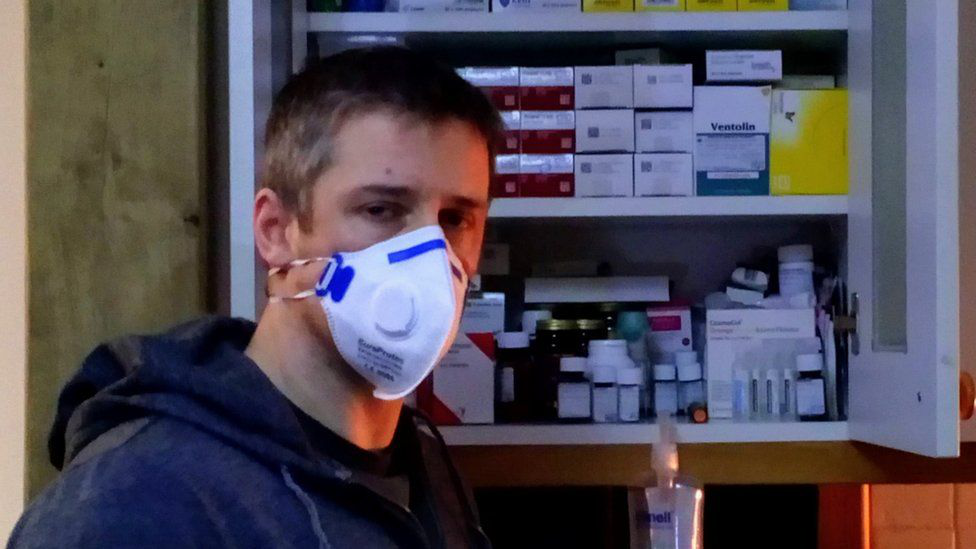

In [6]:
PIL.Image.open(str(with_mask[1]))

In [7]:
without_mask = list(data_dir.glob('without_mask/*'))

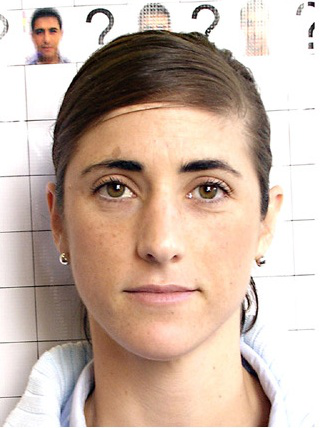

In [11]:
PIL.Image.open(str(without_mask[10]))

In [12]:
mask_images_dict = {
    'with_mask': list(data_dir.glob('with_mask/*')),
    'without_mask': list(data_dir.glob('without_mask/*')),

}
mask_labels_dict = {
    'with_mask': 0,
    'without_mask': 1,

}

In [13]:
X, y = [], []

for mask_name, images in mask_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(mask_labels_dict[mask_name])

In [14]:
X = np.array(X)
y = np.array(y)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(180, 
                                                              180,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

## Without Data Augmentation

In [16]:
num_classes = 2

model = Sequential([
    layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(180, 180, 3)),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

In [17]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [18]:
model.fit(X_train_scaled, y_train, epochs=30)


Epoch 1/30
56/56 [==============================] - 54s 891ms/step - loss: 0.8454 - accuracy: 0.5953
Epoch 2/30
56/56 [==============================] - 52s 925ms/step - loss: 0.2852 - accuracy: 0.8931
Epoch 3/30
56/56 [==============================] - 47s 838ms/step - loss: 0.2276 - accuracy: 0.9120
Epoch 4/30
56/56 [==============================] - 48s 850ms/step - loss: 0.1907 - accuracy: 0.9249
Epoch 5/30
56/56 [==============================] - 48s 853ms/step - loss: 0.1421 - accuracy: 0.9434
Epoch 6/30
56/56 [==============================] - 47s 840ms/step - loss: 0.0889 - accuracy: 0.9647
Epoch 7/30
56/56 [==============================] - 47s 837ms/step - loss: 0.0536 - accuracy: 0.9789
Epoch 8/30
56/56 [==============================] - 47s 846ms/step - loss: 0.0360 - accuracy: 0.9854
Epoch 9/30
56/56 [==============================] - 46s 813ms/step - loss: 0.0149 - accuracy: 0.9974
Epoch 10/30
56/56 [==============================] - 46s 822ms/step - loss: 0.0082 - accura

In [19]:
print(model.evaluate(X_test_scaled,y_test))

19/19 [==============================] - 5s 241ms/step - loss: 0.5935 - accuracy: 0.9227
[0.5935177206993103, 0.9226890802383423]


# Creating Confusion Matrix

In [30]:
import pandas as pd

In [33]:
import seaborn as sns

In [34]:
# Source code credit for this function: https://gist.github.com/shaypal5/94c53d765083101efc0240d776a23823
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('Truth')
    plt.xlabel('Prediction')

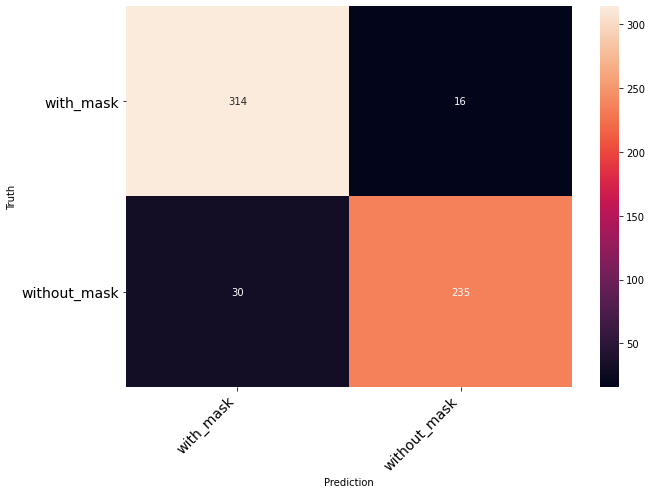

In [35]:
from sklearn.metrics import confusion_matrix 
import numpy as np
y_pred = model.predict(X_test_scaled)
y_pred_classes = [np.argmax(element) for element in y_pred]
cm = confusion_matrix(y_test,y_pred_classes)
print_confusion_matrix(cm,['with_mask','without_mask'])



# With Data Augmentation

In [37]:
num_classes = 2

model1 = Sequential([
    data_augmentation,
    layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(180, 180, 3)),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

In [38]:
model1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [39]:
model1.fit(X_train_scaled, y_train, epochs=30)


Epoch 1/30
56/56 [==============================] - 59s 1s/step - loss: 0.7805 - accuracy: 0.5578
Epoch 2/30
56/56 [==============================] - 56s 1s/step - loss: 0.3652 - accuracy: 0.8537
Epoch 3/30
56/56 [==============================] - 55s 987ms/step - loss: 0.2865 - accuracy: 0.8819
Epoch 4/30
56/56 [==============================] - 55s 980ms/step - loss: 0.2443 - accuracy: 0.8987
Epoch 5/30
56/56 [==============================] - 55s 982ms/step - loss: 0.2629 - accuracy: 0.8944
Epoch 6/30
56/56 [==============================] - 56s 997ms/step - loss: 0.2438 - accuracy: 0.8964
Epoch 7/30
56/56 [==============================] - 56s 1s/step - loss: 0.2278 - accuracy: 0.9036
Epoch 8/30
56/56 [==============================] - 56s 990ms/step - loss: 0.2218 - accuracy: 0.9202
Epoch 9/30
56/56 [==============================] - 57s 1s/step - loss: 0.2201 - accuracy: 0.9190
Epoch 10/30
56/56 [==============================] - 55s 983ms/step - loss: 0.2095 - accuracy: 0.9266
E

In [40]:
print(model1.evaluate(X_test_scaled,y_test))

19/19 [==============================] - 6s 266ms/step - loss: 0.2115 - accuracy: 0.9311
[0.21147888898849487, 0.9310924410820007]


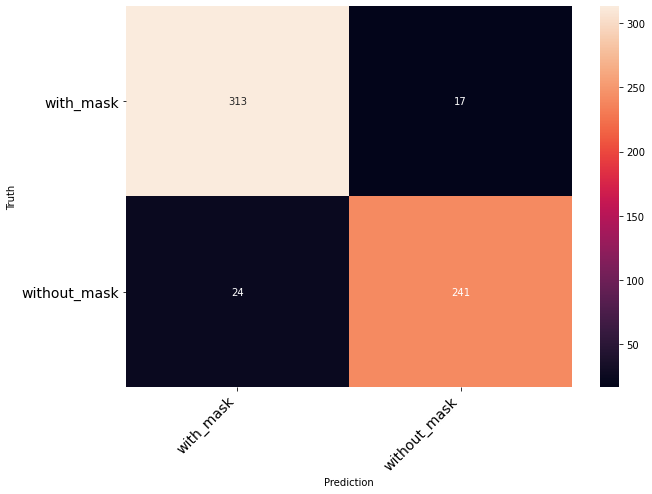

In [41]:
from sklearn.metrics import confusion_matrix 
import numpy as np
y_pred = model1.predict(X_test_scaled)
y_pred_classes = [np.argmax(element) for element in y_pred]
cm = confusion_matrix(y_test,y_pred_classes)
print_confusion_matrix(cm,['with_mask','without_mask'])



In [42]:
num_classes = 2

model2 = Sequential([
    data_augmentation,
    layers.Conv2D(16, 3, padding='same', activation='tanh', input_shape=(180, 180, 3)),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='tanh'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='tanh'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

In [44]:
model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [45]:
model2.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
56/56 [==============================] - 68s 1s/step - loss: 1.4640 - accuracy: 0.6234
Epoch 2/30
56/56 [==============================] - 59s 1s/step - loss: 0.3483 - accuracy: 0.8699
Epoch 3/30
56/56 [==============================] - 57s 1s/step - loss: 0.3190 - accuracy: 0.8681
Epoch 4/30
56/56 [==============================] - 55s 993ms/step - loss: 0.3127 - accuracy: 0.8736
Epoch 5/30
56/56 [==============================] - 55s 990ms/step - loss: 0.2835 - accuracy: 0.8937
Epoch 6/30
56/56 [==============================] - 58s 1s/step - loss: 0.2684 - accuracy: 0.8875
Epoch 7/30
56/56 [==============================] - 61s 1s/step - loss: 0.2551 - accuracy: 0.8994
Epoch 8/30
56/56 [==============================] - 63s 1s/step - loss: 0.2400 - accuracy: 0.9047
Epoch 9/30
56/56 [==============================] - 61s 1s/step - loss: 0.2459 - accuracy: 0.9058
Epoch 10/30
56/56 [==============================] - 59s 1s/step - loss: 0.2769 - accuracy: 0.8977
Epoch 11/30
5

In [46]:
print(model2.evaluate(X_test_scaled,y_test))

19/19 [==============================] - 5s 245ms/step - loss: 0.2715 - accuracy: 0.9227
[0.2714838981628418, 0.9226890802383423]


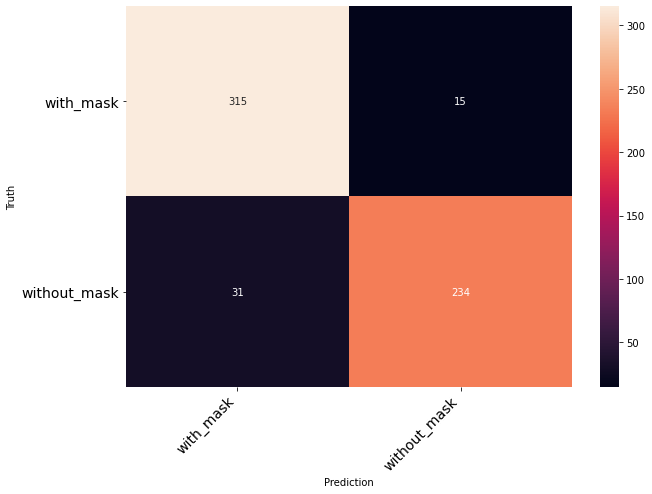

In [47]:
from sklearn.metrics import confusion_matrix 
import numpy as np
y_pred = model2.predict(X_test_scaled)
y_pred_classes = [np.argmax(element) for element in y_pred]
cm = confusion_matrix(y_test,y_pred_classes)
print_confusion_matrix(cm,['with_mask','without_mask'])



# Testing few images using model1

In [54]:
import cv2
import numpy as np
img =cv2.imread(r'C:\Users\shukl\OneDrive\Desktop\eric-clapton-9249026-1-402.jpg',1)
img = cv2.resize(img, (180, 180))
img=img.reshape(-1,180,180,3)
prediction=model1.predict(img)
score = tf.nn.softmax(prediction)
np.argmax(score)

1

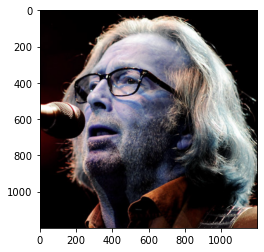

In [53]:
plt.imshow(cv2.imread(r'C:\Users\shukl\OneDrive\Desktop\eric-clapton-9249026-1-402.jpg',1))

In [55]:
import cv2
import numpy as np
img =cv2.imread(r'C:\Users\shukl\OneDrive\Desktop\eric-clapton-birthday-dsb-dire-straitsblog-dire-straits-75th.jpg',1)
img = cv2.resize(img, (180, 180))
img=img.reshape(-1,180,180,3)
prediction=model1.predict(img)
score = tf.nn.softmax(prediction)
np.argmax(score)

1

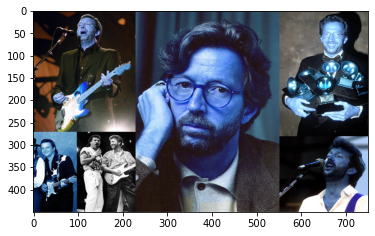

In [56]:
plt.imshow(cv2.imread(r'C:\Users\shukl\OneDrive\Desktop\eric-clapton-birthday-dsb-dire-straitsblog-dire-straits-75th.jpg',1))

In [58]:
import cv2
import numpy as np
img =cv2.imread(r'C:\Users\shukl\OneDrive\Desktop\5f60e6cb24000005101ed4f3.jpeg',1)
img = cv2.resize(img, (180, 180))
img=img.reshape(-1,180,180,3)
prediction=model1.predict(img)
score = tf.nn.softmax(prediction)
np.argmax(score)

0

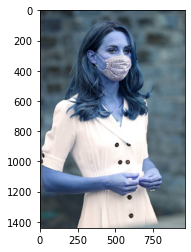

In [59]:
plt.imshow(cv2.imread(r'C:\Users\shukl\OneDrive\Desktop\5f60e6cb24000005101ed4f3.jpeg',1))

# Using webcam for live detection

In [60]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model


labels_dict={1:'without mask',0:'mask'}
color_dict={0:(0,0,255),1:(0,255,0)}

size = 4
webcam = cv2.VideoCapture(0) #Use camera 0

# We load the xml file
classifier = cv2.CascadeClassifier('E:\ML\haarcascade_frontalface_default.xml')

while True:
    (rval, im) = webcam.read()
    im=cv2.flip(im,1,1) #Flip to act as a mirror

    # Resize the image to speed up detection
    mini = cv2.resize(im, (im.shape[1] // size, im.shape[0] // size))

    # detect MultiScale / faces 
    faces = classifier.detectMultiScale(mini)

    # Draw rectangles around each face
    for f in faces:
        (x, y, w, h) = [v * size for v in f] #Scale the shapesize backup
        #Save just the rectangle faces in SubRecFaces
        face_img = im[y:y+h, x:x+w]
        resized=cv2.resize(face_img,(180,180))
        normalized=resized/255.0
        reshaped = np.reshape(normalized, (1, 180, 180, 3))
        reshaped = np.vstack([reshaped])
        result=model1.predict(reshaped)
        #print(result)
        
        label=np.argmax(result,axis=1)[0]
      
        cv2.rectangle(im,(x,y),(x+w,y+h),color_dict[label],2)
        cv2.rectangle(im,(x,y-40),(x+w,y),color_dict[label],-1)
        cv2.putText(im, labels_dict[label], (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)
        
    # Show the image
    cv2.imshow('LIVE',   im)
    key = cv2.waitKey(10)
    # if Esc key is press then break out of the loop 
    if key == 27: #The Esc key
        break
# Stop video
webcam.release()

# Close all started windows
cv2.destroyAllWindows()